In [133]:
!pip install anvil-uplink
# !pip install pgmpy

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [134]:
# from google.colab import files
# file=files.upload()

In [135]:
# !unzip PGM_Project.zip

In [136]:
import anvil.server

In [137]:
anvil.server.connect("QCH763PK6D7X3PIIWQ355H5L-O3UMHGEUAHTCYLMK")

In [138]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork

In [139]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Setting up Model Structure
Here we define the connections between edges that the authors in the paper have worked out for us

### Features:

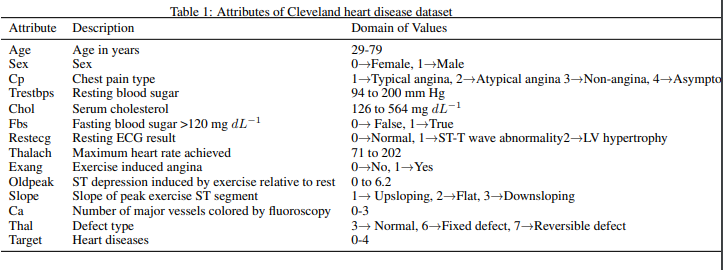

In [140]:
from IPython.display import Image
Image('Features_desc.png')

### BayesNet Structure

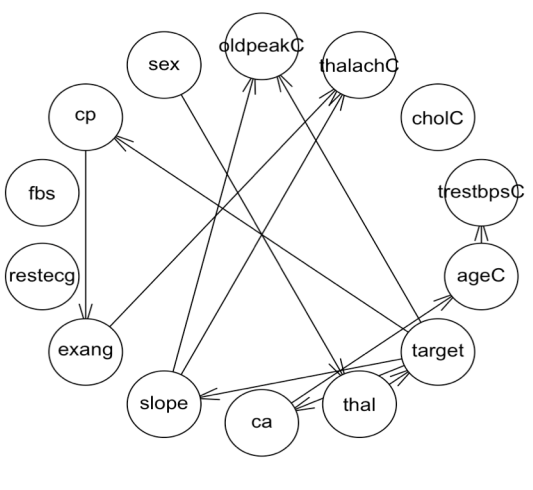

In [141]:
Image('bayes_net.png')

In [142]:
model=BayesianNetwork([('age','trestbps'),('sex','thal'),
                     ('cp','exang'),('exang','thalach'),
                     ('slope','oldpeak'),('slope','thalach'),
                     ('ca','age'),('thal','target'),
                     ('target','ca'),('target','cp'),('target','oldpeak'),('target','slope')])

In [143]:
model.add_node('chol')

In [144]:
model.add_node('fbs')

In [145]:
model.add_node('restecg')

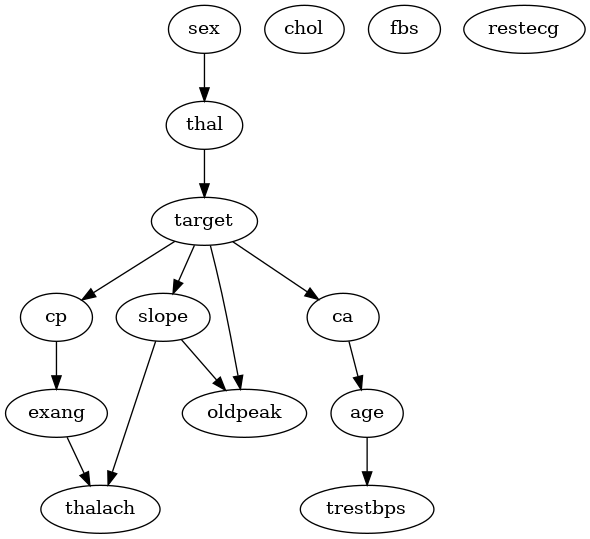

In [146]:
display(Image((nx.drawing.nx_pydot.to_pydot(model)).create_png()))

### CPDs for 12 variables

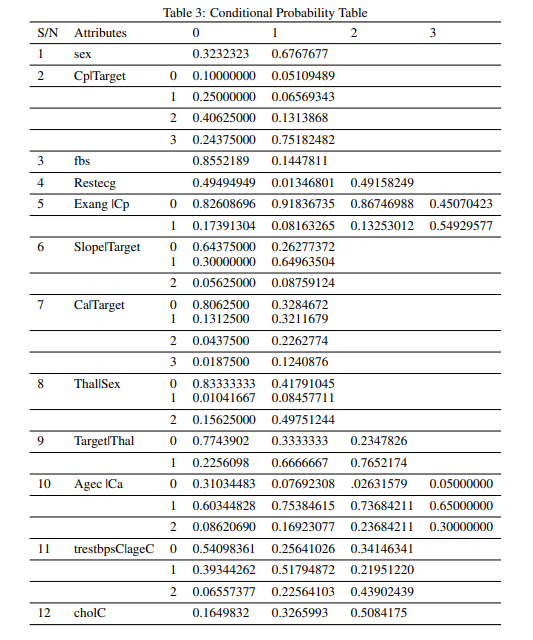

In [147]:
Image('cpd_12.png')

### Add the CPDs

In pgmpy the `columns are the evidences` and `rows are the states of the variable`

In [148]:
# 1 sex
sex_cpd=TabularCPD(variable='sex',variable_card=2,values=[[0.3232323],[0.6767677]])

In [149]:
# 2 cp|target
cp_cpd=TabularCPD(variable='cp',variable_card=4,values=[[0.10000000, 0.05109489],
                                                        [0.25000000, 0.06569343],
                                                        [0.40625000, 0.1313868],
                                                        [0.24375000, 0.75182482]],evidence=['target'],
                                                         evidence_card=[2])

In [150]:
# 3 fbs
fbs_cpd=TabularCPD(variable='fbs',variable_card=2,values=[[0.8552189],[0.1447811]])

In [151]:
# 4 restecg
restecg_cpd=TabularCPD(variable='restecg',variable_card=3,values=[[0.49494949],[0.01346801], [0.49158249]])

In [152]:
# 5 exang|cp
exang_cpd=TabularCPD(variable='exang',variable_card=2,values=[[ 0.82608696,0.91836735,0.86746988,0.45070423],
                                                              [0.17391304,0.08163265,0.13253012,0.54929577]],
                                                                evidence=['cp'],evidence_card=[4])

In [153]:
# 6 slope|target
slope_cpd=TabularCPD(variable='slope',variable_card=3,values=[[0.64375000, 0.26277372],
                                                              [0.30000000, 0.64963504],
                                                              [0.05625000,0.08759124]],
                                                               evidence=['target'],evidence_card=[2])

In [154]:
# 7 ca|target
ca_cpd=TabularCPD(variable='ca',variable_card=4,values=[[0.8062500, 0.3284672],
                                                          [0.1312500, 0.3211679],
                                                          [0.0437500, 0.2262774],
                                                          [0.0187500, 0.1240876],
                                                         ],evidence=['target'],evidence_card=[2])

In [155]:
# 8 thal|sex
thal_cpd=TabularCPD(variable='thal',variable_card=3,values=[[0.83333333, 0.41791045],
                                                          [ 0.01041667, 0.08457711],
                                                          [ 0.15625000, 0.49751244]
                                                         ],evidence=['sex'],evidence_card=[2])

In [156]:
# 9 target|thal
target_cpd=TabularCPD(variable='target',variable_card=2,values=[[0.7743902, 0.3333333, 0.2347826],
                                                                [0.2256098, 0.6666667, 0.7652174],
                                                         ],evidence=['thal'],evidence_card=[3])

In [157]:
#10 age|ca
age_cpd=TabularCPD(variable='age',variable_card=3,values=[[0.31034483,0.07692308,0.02631579,0.05000000],
                                                          [0.60344828,0.75384615,0.73684211,0.65000000],
                                                          [ 0.08620690,0.16923077,0.23684211,0.30000000]],
                                                        evidence=['ca'],evidence_card=[4])

In [158]:
# 11 trestbps|age
trestbps_cpd=TabularCPD(variable='trestbps',variable_card=3,values=[[ 0.54098361,0.25641026,0.34146341],
                                                                    [ 0.39344262,0.51794872,0.21951220],
                                                                    [ 0.06557377,0.22564103,0.43902439]],
                                                        evidence=['age'],evidence_card=[3])

In [159]:
# 12 chol
chol_cpd=TabularCPD(variable='chol',variable_card=3,values=[[0.1649832], [0.3265993], [0.5084175]])

### CPD for Thalach variable

In [160]:
Image('cpd_thalch_C.png')

FileNotFoundError: No such file or directory: 'PGM_Project/cpd_thalch_C.png'

FileNotFoundError: No such file or directory: 'PGM_Project/cpd_thalch_C.png'

<IPython.core.display.Image object>

In [161]:
# P(thalach | slope, exang):
# +------+------+------+------+------+------+------+------+------+------+-------------+----------------+
# |     slope |               0             |             1             |             2                |
# +------+------+------+------+------+------+------+------+------+------+----------------+-------------+
# |     exang |        0      |       1     |      0      |      1      |          0     |   1         |
# +------+------+------+------+------+------+------+------+------+------+----------------+-------------+
# | thalach=0 |   0.1504425   |  0.3461538  | 0.4133333   |  0.7580645  |     0.1666667  |  0.7777778  |
# +------+------+------+------+------+------+------+------+------+------+----------------+-------------+
# | thalach=1 |   0.8495575   |  0.6538462  | 0.5866667   |   0.2419355 |     0.8333333  | 0.2222222   |
# +------+------+------+------+------+------+------+------+------+------+----------------+-------------+


In [162]:
#thalach|slope,exang
thalach_cpd=TabularCPD(variable='thalach',variable_card=2,
                      
                      values=[
                          [0.1504425,0.3461538,0.4133333,0.7580645,0.1666667,0.7777778],
                          [0.8495575,0.6538462,0.5866667,0.2419355,0.8333333,0.2222222]
                      ],evidence=['exang','slope'],evidence_card=[2,3])

In [163]:
model.get_parents('thalach')

['exang', 'slope']

### CPD for oldpeak variable

In [164]:
Image('cpd_olpeak.png')

FileNotFoundError: No such file or directory: 'PGM_Project/cpd_olpeak.png'

FileNotFoundError: No such file or directory: 'PGM_Project/cpd_olpeak.png'

<IPython.core.display.Image object>

<!-- P(oldpeak | slope, target):
+-------------+-------------+-----------+-----------+-------------+----------------+--------------+
|     target  |                    0                |                          1                  |
+-------------+-------------+-----------+-----------+-------------+----------------+--------------+
|     slope   |        0    |     1     |      2    |      0      |      1         |      2       |
+-------------+------+------+-----------+-----------+-------------+------+---------+--------------+
| oldpeak=0   |  0.990291262|0.958333333|0.555555556| 0.944444444 |  0.651685393   |  0.166666667 |
+-------------+------+------+-----------+-----------+-------------+----------------+--------------+
| oldpeak=1   |  0.009708738|0.041666667|0.444444444| 0.055555556 |  0.348314607   |  0.833333333 |
+-------------+-------------+-----------+-----------+-------------+----------------+--------------+ -->

In [165]:
#oldpeak|target,slope
oldpeak_cpd=TabularCPD(variable='oldpeak',variable_card=2,
                      
                      values=[
                          [0.990291262,0.958333333,0.555555556,0.944444444,0.651685393,0.166666667],
                          [0.009708738,0.041666667,0.444444444,0.055555556,0.348314607,0.833333333]
                      ],evidence=['target','slope'],evidence_card=[2,3])

In [166]:
model.get_parents('oldpeak')

['slope', 'target']

In [167]:
model.add_cpds(sex_cpd,cp_cpd,fbs_cpd,restecg_cpd,exang_cpd,slope_cpd,ca_cpd,thal_cpd,target_cpd,age_cpd,
               trestbps_cpd,chol_cpd,thalach_cpd,oldpeak_cpd)

In [168]:
model.get_parents('thalach')

['exang', 'slope']

In [169]:
model.check_model()

True

### `model` is now ready for inference

but let's experiment with the dataset ourselves and use structure and parameter learning on the data

In [170]:
import pandas as pd
import numpy as np

In [171]:
df=pd.read_csv('heart_cleveland_upload.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'PGM_Project/heart_cleveland_upload.csv'

In [ ]:
df.rename(columns = {'condition':'target'}, inplace = True)

In [ ]:
df

In [ ]:
df.isna().sum() #no missing values in this dataset

#### We have to Discretize our dataset's 5 continous features: age, trestbps, chol, thalach, and oldpeak

In [ ]:
def preprocessing_pipeline(age,trestbps,chol,thalach,oldpeak):
    """Only takes care of 5 continous cases, categorizing them"""
    if age>=29 and age<=45:
        age=0
    elif age>45 and age<=62:
        age=1
    elif age>62 and age<=79:
        age=2
    if trestbps>=94 and trestbps<=129:
        trestbps=0
    elif trestbps>129 and trestbps<=165:
        trestbps=1
    elif trestbps>165 and trestbps<=200:
        trestbps=2
    if chol>=126 and chol<=272:
        chol=0
    elif chol>272 and chol<=419:
        chol=1
    elif chol>419 and chol<=564:
        chol=2
    if thalach>=71 and thalach<=131:
        thalach=0
    elif thalach>131 and thalach<=202:
        thalach=1
    if oldpeak>=0.0 and oldpeak<=3.1:
        oldpeak=0
    elif oldpeak>3.1 and oldpeak<=6.2:
        oldpeak=1
        
    return age,trestbps,chol,thalach,oldpeak
      

In [ ]:
for index,row in df.iterrows():
    df.age.iloc[index],df.trestbps.iloc[index],df.chol.iloc[index],df.thalach.iloc[index],df.oldpeak.iloc[index] = preprocessing_pipeline(row['age'],row['trestbps'],row['chol'],row['thalach'],row['oldpeak'])

In [ ]:
df.isna().sum()

In [ ]:
df

### Discretization and missing values imputation is done

In [ ]:
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BicScore, PC, K2Score
from pgmpy.estimators import BayesianEstimator,MaximumLikelihoodEstimator,ExpectationMaximization,StructureEstimator

In [ ]:
# Create a checkpoint
df.to_csv('heart_cleveland_upload_encoded.csv')
df

In [ ]:
#split intro training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df.target,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)


In [ ]:
X_train.shape,X_test.shape

In [ ]:
y_train.shape,y_test.shape

In [ ]:
type(X_train),type(y_train)#X_train,X_test are dfs while y_train,y_test are series objects

In [ ]:
#concatenate the X_train,y_train into df_train and X_test,y_test intro df_test
df_train=pd.concat([X_train,y_train],axis=1)
df_train

In [ ]:
df_test=pd.concat([X_test,y_test],axis=1)
df_test

### Structure learning 

We'll perform structure learning on the whole dataset, and parameter learning with a training set comprising 70% of the total dataset
And we'll test out the accuracy of the model using the test set comprising the remaining 30% of the total dataset.


In [ ]:
hc1 = HillClimbSearch(df, K2Score(df))
est_model = hc1.estimate()
display(Image((nx.drawing.nx_pydot.to_pydot(est_model)).create_png()))

In [ ]:
est_model.get_parents('slope')

In [ ]:
model.get_parents('slope')

In [ ]:
model

In [ ]:
est_model=BayesianNetwork(est_model)#convert DAG object to BN object

In [ ]:
est_model

### Parameter learning on df_train

In [ ]:
est_model.fit(df_train, estimator=BayesianEstimator, prior_type="BDeu")

In [ ]:
est_model.check_model()

In [ ]:
est_model.get_independencies()

In [ ]:
model.get_independencies()

In [ ]:
len(df_test)

In [ ]:
model.get_cpds()

In [ ]:
est_model.get_cpds()

### Find active trail nodes

In [ ]:
#model
model.active_trail_nodes('target')

In [ ]:
est_model.active_trail_nodes('target')

### Find local independencies

In [ ]:
model.local_independencies('target')

In [ ]:
est_model.local_independencies('target')


### Find out the accuracy of both the models

In [ ]:
from pgmpy.inference import VariableElimination

In [ ]:
def accuracy_precision_recall(df_test,model):
    target_inference=VariableElimination(model)
    true_negative,true_positive,false_negative,false_postive=0,0,0,0
    truth_values={k:v for k,v in zip(list(df_test.index),list(df_test.target))}
    df_test=df_test.drop('target',axis=1)
    for index,row in df_test.iterrows():
        cols=[col for col in df_test.columns]
        evidence_dict={k:v for k,v in zip(cols,list(df_test.loc[index][cols]))}
        prediction=target_inference.map_query(['target'],evidence=evidence_dict)
        if truth_values[index]==prediction['target']:
            if truth_values[index]==0:
                true_negative+=1
            else:
                true_positive+=1
        #FalsePositives
        elif truth_values[index]==0 and prediction['target']==1:
            false_postive+=1
        #FalseNegatives
        elif truth_values[index]==1 and prediction['target']==0:
            false_negative+=1
                
    return [(true_positive+true_negative)/len(df_test),true_positive/(true_positive+false_postive),
               true_positive/(true_positive+false_negative)]#accuracy,precision,recall

In [ ]:
accuracy_precision_recall(df_test,model)

In [ ]:
accuracy_precision_recall(df_test,est_model)

In [ ]:
display(Image((nx.drawing.nx_pydot.to_pydot(est_model)).create_png()))

In [ ]:
display(Image((nx.drawing.nx_pydot.to_pydot(model)).create_png()))

In [ ]:
df_train

### Structure learning on only the training set

In [ ]:
hc_train_set = HillClimbSearch(df_train, K2Score(df_train))
est_model_train_set = hc_train_set.estimate()
display(Image((nx.drawing.nx_pydot.to_pydot(est_model_train_set)).create_png()))

In [ ]:
est_model_train_set=BayesianNetwork(est_model_train_set)

### Parameter Learning with different estimators on the training set, accuracy on test set

In [ ]:
def accuracy_precision_recall(df_test,model):
    target_inference=VariableElimination(model)
    true_negative,true_positive,false_negative,false_postive=0,0,0,0
    truth_values={k:v for k,v in zip(list(df_test.index),list(df_test.target))}
    df_test=df_test.drop('target',axis=1)
    for index,row in df_test.iterrows():
        cols=[col for col in df_test.columns]
        evidence_dict={k:v for k,v in zip(cols,list(df_test.loc[index][cols]))}
        prediction=target_inference.map_query(['target'],evidence=evidence_dict)
        if truth_values[index]==prediction['target']:
            if truth_values[index]==0:
                true_negative+=1
            else:
                true_positive+=1
        #FalsePositives
        elif truth_values[index]==0 and prediction['target']==1:
            false_postive+=1
        #FalseNegatives
        elif truth_values[index]==1 and prediction['target']==0:
            false_negative+=1
                
    return [(true_positive+true_negative)/len(df_test),true_positive/(true_positive+false_postive),
               true_positive/(true_positive+false_negative)]#accuracy,precision,recall

In [ ]:
est_model_train_set.fit(df_train)#MLE Estimator

In [ ]:
accuracy_precision_recall(df_test,est_model_train_set)

In [ ]:
model.save('orginal_cvd_BN.xmlbif', filetype='xmlbif')

In [ ]:
est_model.save('estimated_cvd_BN.xmlbif',filetype='xmlbif')

In [ ]:
est_model_train_set.save('estimated_train_test_cvd_BN.xmlbif',filetype='xmlbif')

In [ ]:
model = BayesianNetwork.load('orginal_cvd_BN.xmlbif', filetype='xmlbif')
print(model.check_model())              # check if CPDs are present
est_model=BayesianNetwork.load('estimated_cvd_BN.xmlbif',filetype='xmlbif')
print(est_model.check_model())
est_model_train_set=BayesianNetwork.load('estimated_train_test_cvd_BN.xmlbif',filetype='xmlbif')
print(est_model_train_set.check_model())

Some changes made to the code to incorporate anvil functionality:

In [ ]:
def accuracy_precision_recall(df_test,model):
    target_inference=VariableElimination(model)
    true_negative,true_positive,false_negative,false_postive=0,0,0,0
    truth_values={k:v for k,v in zip(list(df_test.index),list(df_test.target))}
    df_test=df_test.drop('target',axis=1)
    for index,row in df_test.iterrows():
        cols=[col for col in df_test.columns]
        evidence_dict={k:v for k,v in zip(cols,list(df_test.loc[index][cols]))}
        prediction=target_inference.map_query(['target'],evidence=evidence_dict)
        if truth_values[index]==prediction['target']:
            if truth_values[index]==0:
                true_negative+=1
            else:
                true_positive+=1
        #FalsePositives
        elif truth_values[index]==0 and prediction['target']==1:
            false_postive+=1
        #FalseNegatives
        elif truth_values[index]==1 and prediction['target']==0:
            false_negative+=1
                
    return [(true_positive+true_negative)/len(df_test),true_positive/(true_positive+false_postive),
               true_positive/(true_positive+false_negative)]#accuracy,precision,recall

In [ ]:
def preprocessing_pipeline(age,trestbps,chol,thalach,oldpeak):
    """Only takes care of 5 continous cases, categorizing them"""
  
    if age>=29 and age<=45:
        age=0
    elif age>45 and age<=62:
        age=1
    elif age>62 and age<=79:
        age=2
    if trestbps>=94 and trestbps<=129:
        trestbps=0
    elif trestbps>129 and trestbps<=165:
        trestbps=1
    elif trestbps>165 and trestbps<=200:
        trestbps=2
    if chol>=126 and chol<=272:
        chol=0
    elif chol>272 and chol<=419:
        chol=1
    elif chol>419 and chol<=564:
        chol=2
    if thalach>=71 and thalach<=131:
        thalach=0
    elif thalach>131 and thalach<=202:
        thalach=1
    if oldpeak>=0.0 and oldpeak<=3.1:
        oldpeak=0
    elif oldpeak>3.1 and oldpeak<=6.2:
        oldpeak=1
    return age,trestbps,chol,thalach,oldpeak
  

In [ ]:
@anvil.server.callable
def predict(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):
    age,trestbps,chol,thalach,oldpeak=preprocessing_pipeline(age,trestbps,chol,thalach,oldpeak)
    target_inference=VariableElimination(est_model_train_set)
    cols=[col for col in df_test.columns if col!='target']
    evidence_dict={k:v for k,v in zip(cols,[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal])}
    prediction=target_inference.map_query(variables=['target'],evidence=evidence_dict)
    return int(prediction['target'])

In [ ]:
anvil.server.wait_forever()

In [ ]:
# predict(64,1,0,170,227,0,2,155,0,0.6,1,0,2)